# Exercici 1 & 2

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0). Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.


Make at least three different classification models to try to predict DelayedFlights.csv's flight delay (ArrDelay) as best as possible. Consider if the flight arrived late or not (ArrDelay > 0). Compare the classification models using accuracy, a confusion matrix and other more advanced metrics.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("DelayedFlights.csv", index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The data consists of flight arrival and departure details for all commercial flights within the USA. Variable descriptions:
* 1 Year; 2008 
* 2 Month; 1-12 
* 3 DayofMonth; 1-31 
* 4 DayOfWeek; 1 (Monday) - 7 (Sunday) 
* 5 DepTime; actual departure time (local, hhmm) 
* 6 CRSDepTime; scheduled departure time (local, hhmm) 
* 7 ArrTime; actual arrival time (local, hhmm) 
* 8 CRSArrTime; scheduled arrival time (local, hhmm) 
* 9 UniqueCarrier; unique carrier code 
* 10 FlightNum; flight number 
* 11 TailNum; plane tail number 
* 12 ActualElapsedTime; in minutes 
* 13 CRSElapsedTime; in minutes 
* 14 AirTime; in minutes 
* 15 ArrDelay; arrival delay, in minutes 
* 16 DepDelay; departure delay, in minutes 
* 17 Origin; origin IATA airport code 
* 18 Dest; destination IATA airport code 
* 19 Distance; in miles 
* 20 TaxiIn; taxi in time, in minutes 
* 21 TaxiOut; taxi out time in minutes 
* 22 Cancelled; was the flight cancelled? 
* 23 CancellationCode; reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
* 24 Diverted; 1 = yes, 0 = no 
* 25 CarrierDelay; in minutes 
* 26 WeatherDelay; in minutes 
* 27 NASDelay; in minutes 
* 28 SecurityDelay; in minutes 
* 29 LateAircraftDelay; in minutes

In [4]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


We are first deleting some columns that are not needed. The Year column, that is always 2008; the Cancelled column, as well as the rows that have cancelled = 1, because those are of no interest if we are studying delay; the CancellationCode column, for the same reasons; the Diverted column, as well as the rows that have diverted = 1, because those are of no interest if we are studying delay; and the Origin and Dest because they add no real information that the column Distance doesn't provide, as well as the TailNum column.

In [3]:
#remove the Year column
df = df.drop(["Year"], axis = 1)

#keep only rows that were not cancelled
df = df[df.Cancelled == 0]

#remove the Cancelled row
df = df.drop(["Cancelled"], axis = 1)

#remove CancellationCode column
df = df.drop(["CancellationCode"], axis = 1)

#keep only rows that were not diverted
df = df[df.Diverted == 0]

#remove the Diverted row
df = df.drop(["Diverted"], axis = 1)

#remove the Origin, Dest, and TailNum row
df = df.drop(["Origin", "Dest", "TailNum"], axis = 1)

df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


We are now going to take care of the NaN values as well.

In [4]:
df.isna().sum()

Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Distance                  0
TaxiIn                    0
TaxiOut                   0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [7]:
df[df["ArrDelay"] <= 0].count()

Month                204956
DayofMonth           204956
DayOfWeek            204956
DepTime              204956
CRSDepTime           204956
ArrTime              204956
CRSArrTime           204956
UniqueCarrier        204956
FlightNum            204956
ActualElapsedTime    204956
CRSElapsedTime       204956
AirTime              204956
ArrDelay             204956
DepDelay             204956
Distance             204956
TaxiIn               204956
TaxiOut              204956
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
dtype: int64

The large number of NaN values don't coincide with an arrival delay of 0 or less, so filling those values with 0 would cause to skew the models. Since they take up such a large percentage of the dataset, removing them would cause a notable loss of information. We will be filling in the NaN with 0.

In [8]:
df[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]
  ].describe().round(2)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,19.18,3.70,15.02,0.09,25.30
std,43.55,21.49,33.83,2.02,42.05
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,2.00,0.00,8.00
75%,21.00,0.00,15.00,0.00,33.00
max,2436.00,1352.00,1357.00,392.00,1316.00


In [5]:
#filling NaN values in these columns with their median
df["CarrierDelay"] = df["CarrierDelay"].fillna(0)
df["WeatherDelay"] = df["WeatherDelay"].fillna(0)
df["NASDelay"] = df["NASDelay"].fillna(0)
df["SecurityDelay"] = df["SecurityDelay"].fillna(0)
df["LateAircraftDelay"] = df["LateAircraftDelay"].fillna(0)

Next we will transform the ArrDelay into categorical data. If there is delay (ArrDelay > 0), it will be True, and if there is no delay (ArrDelay <= 0), it will be False. This new column will be called Late. 

In [6]:
df["Late"] = df["ArrDelay"] > 0
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,...,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Late
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,128.0,...,8.0,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,False
1,1,3,4,754.0,735,1002.0,1000,WN,3231,128.0,...,19.0,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,True
2,1,3,4,628.0,620,804.0,750,WN,448,96.0,...,8.0,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,True
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,90.0,...,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,True
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,101.0,...,25.0,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,True


In [7]:
df.Late.value_counts()

True     1723415
False     204956
Name: Late, dtype: int64

Having created the new column, we will now create our models. We will not use all of the dataset as it is too big, and not all of the columns have any correlation to the one we want to predict. 

[Text(0.5, 1, 'Correlations')]

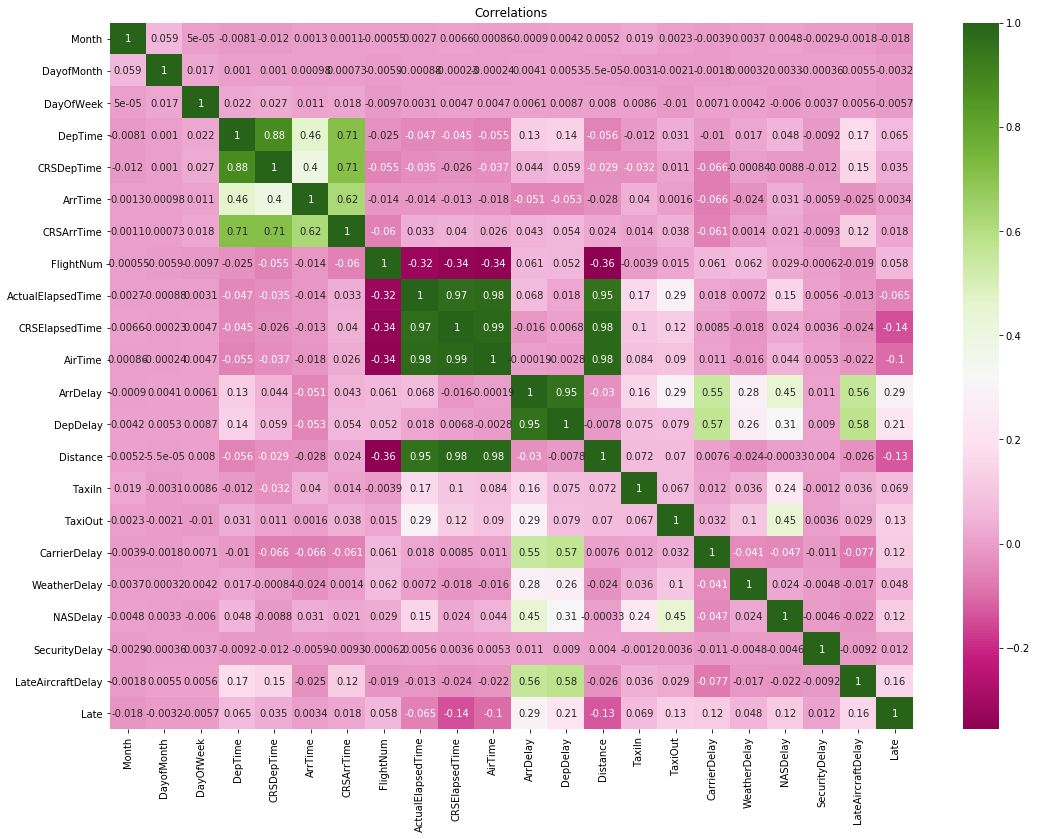

In [8]:
plt.figure(figsize = (18, 13))
sns.heatmap(df.corr(), annot = True, cmap = "PiYG").set(
    title = "Correlations")

We will pick DepDelay, TaxiIn, TaxiOut, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, and LateAircraftDelay. We will also take a sample of 1% of the dataset as it is very big.

In [9]:
#making a sample of 1% of the dataset
random_df = df.sample(frac = 0.01, random_state = 0)

In [10]:
X = random_df[["DepDelay", "TaxiIn", "TaxiOut", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
               "LateAircraftDelay"]]
y = random_df[["Late"]]

In [11]:
from sklearn.neural_network import MLPClassifier

#training 
mlp = MLPClassifier(hidden_layer_sizes = (10))
mlp.fit(X, y)

pred_nn = mlp.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion matrix for the neural network:\n", confusion_matrix(y, pred_nn))

Confusion matrix for the neural network:
 [[  223  1856]
 [  122 17083]]


True positive: 223

True negative: 17083

False positive: 1856

False negative: 122

In [13]:
from sklearn import metrics
print("Sensitivity:", 1 - metrics.accuracy_score(y, pred_nn).round(2))
print("Specificity:", metrics.recall_score(y, pred_nn).round(2))

Sensitivity: 0.09999999999999998
Specificity: 0.99


In [14]:
print("Classification report for the neural network:\n", classification_report(y, pred_nn))

Classification report for the neural network:
               precision    recall  f1-score   support

       False       0.65      0.11      0.18      2079
        True       0.90      0.99      0.95     17205

    accuracy                           0.90     19284
   macro avg       0.77      0.55      0.56     19284
weighted avg       0.87      0.90      0.86     19284



This model shows a large percentage of correct predictions, 90%, however, it's sensitivity is very low. Since the dataset is very imbalanced, this model is not much better than a model that always classifies as negative. 

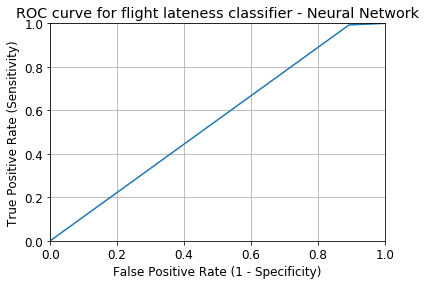

In [19]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y, pred_nn)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for flight lateness classifier - Neural Network')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

A Receiver Operating Characteristic (ROC) curve allows us to see how sensitivity and specificity are affected when changing the classification threshold. That means the limit where the classifier predicts as one type or another, in this case, if the flight is late or not. By default, it is set at 0.5 on the model.

In [18]:
print("Area under the curve:", metrics.roc_auc_score(y, pred_nn).round(2))

Area under the curve: 0.55


The Area Under the curve (AUC) of the ROC summarizes the performance of the model, and goes from 0 to 1, where 1 is a perfect model. this, unlike the accuracy score, is a useful metric in the case of having a very imbalanced class, such as our case. We can see that although the accuracy is score is 0.90, the AUC is 0.55, which shows that the model actually performs quite poorly, and is not much better than a dummy classifier. 